# Data Visualisation Notebook

As we learnt in the data science and AI lecture, a very important aspect of analysing data is to visualise. So, we will learn how to visualise data using mostly seaborn. 
We already came across seaborn in the prev semester. Here we will use the data from the titanic dataset to see some graphs to help us understand the data and relationships between factors.

Let's load the data using pandas as we learnt in the previous notebook.

In [119]:
import pandas as pd
# we are loading data from github. 
dataurl = 'https://github.com/rrr-uom-projects/MPiCRT-AI/raw/main/Data/titanic.csv' 
pax = pd.read_csv(dataurl, sep = ',')

We need to understand the data we have to start making sense of it. Here is a short description of the series:

- **PassengerId** Arbitrary nr between 1 and 841
- **Survived** Weather Survived or not: 0 = No, 1 = Yes
- **Pclass** Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
- **Name** Name of the Passenger
- **Sex** Female/male
- **Age** Age in years
- **SibSp** No. of siblings / spouses aboard the Titanic
- **Parch** No. of parents / children aboard the Titanic
- **Ticket** Ticket number
- **Fare** Passenger fare
- **Cabin** Cabin number
- **Embarked** Port of Embarkation:C = Cherbourg, Q = Queenstown, S = Southampton


Let's sort the categorical variables correctly here.

In [120]:
pax['Sex'] = pax['Sex'].astype('category')
pax['Survived'] = pax['Survived'].astype("category")
pax['Pclass'] = pax['Pclass'].astype("category")
pax['Embarked'] = pax['Embarked'].astype("category")

## Seaborn 
Seaborn is a Python data visualisation library based on **Matplotlib** that provides a high-level interface for creating graphics, with a big focus on statistical graphics. It is particularly well-suited for visualising datasets using Pandas data structures (DataFrames).

Documentation for the package can be found here: https://seaborn.pydata.org/index.html 

Let's now import the libraries we need, seaborn and matplotlib:

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

If you have an error in the previous line, that means that seaborn is not installed. You can use the following code: 
```python
!pip install seaborn
```


Let's start exploring the data. Do not forget to visit [data-to-vis][https://www.data-to-viz.com/] for some ideas on how to visualise different types of data. 

### Plotting qualitative (or categorical) data

Let's do some plotting for categorical values (nominal and ordinal).  Let's use sex and pclass as example of these here.

For example, we can show how many observations of each category exist in the dataset.  For that we can use *sns.countplot()* which creates a *barplot*, where the size (height/length) of the bar represents the total number of observation for that category in the dataset.

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(9, 4))#

sns.countplot(x="Sex", data=pax, ax=axs[0])
sns.countplot(x="Pclass", data=pax, ax=axs[1])

In [ ]:
sns.countplot(x="Pclass", data=pax, stat="percent")

We can also plot the combined information between these variables. For example we can stratify the counts of the class according to the sex. It is easily done in seaborn, by using the input 'hue':

In [ ]:
sns.countplot(x="Pclass", hue='Sex', data=pax)

### Plotting quantitative data

An important aspect to plot in quantitative data is the distribution of the values. Let's take age for example. We can plot the distribution of this variable using histograms or density plots.


#### Histogram: 
is a bar plot where the axis representing the variable is divided into a set of discrete **bins** and the count of observations falling within each bin is shown using the height of the corresponding bar. Changing the number of bins can give us different insights. 

In seaboarn, histograms can be created using histplot():

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 3)) # plotting multiple panels
sns.histplot( x='Age', data=pax, ax=axs[0] )
sns.histplot( x='Age', data=pax, bins=100, ax=axs[1] )

#### Density plot:
This is another way to plot the distribution of a viariable. It relies on estimating the density via *kernel density estimate (KDE)* plots. KDE represents the data using a continuous probability density curve.

Relative to a histogram, KDE can produce a plot that is less cluttered and more interpretable, especially when drawing multiple distributions (we will do this later). But it has the potential to introduce distortions if the underlying distribution is bounded or not smooth. Like bins in a histogram, the quality of the representation also depends on the selection of good smoothing parameters (bw_adjust, where larger values generates smoother curves).

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(10, 3)) # plotting multiple panels
sns.kdeplot( x='Age', data=pax, ax=axs[0] )
sns.kdeplot( x='Age', data=pax, bw_adjust=0.1, ax=axs[1] )
sns.kdeplot( x='Age', data=pax, bw_adjust=1000, ax=axs[2] )

### Plotting two or more variables together

We can plot plot values of different variables against each other, for example using scatter plots.  Let's see if there is any pattern between Age vs Fare:

In [ ]:
sns.scatterplot(x='Age',y='Fare', data=pax)

We can also use hue to distinguish these values for categories (or discrete values).

<Axes: xlabel='Age', ylabel='Fare'>

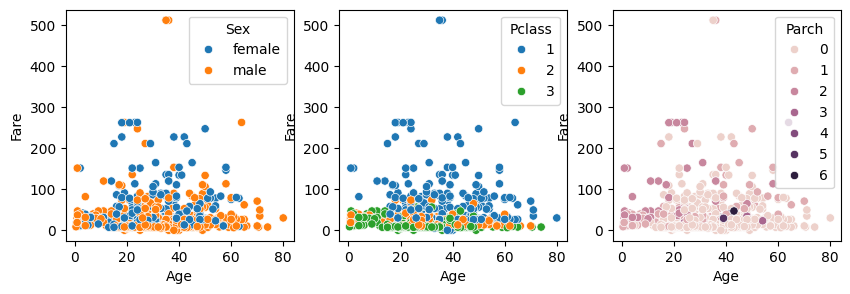

In [147]:
fig, axs = plt.subplots(1,3,figsize=(10, 3)) # plotting multiple panels
sns.scatterplot(x='Age',y='Fare', hue='Sex', data=pax, ax=axs[0] )
sns.scatterplot(x='Age',y='Fare', hue='Pclass', data=pax, ax=axs[1] )
sns.scatterplot(x='Age',y='Fare', hue='Parch', data=pax, ax=axs[2] )

Seaborn also allows you to combine plots, for example you can have the scatter plots and density plots for each dimension in a single place:

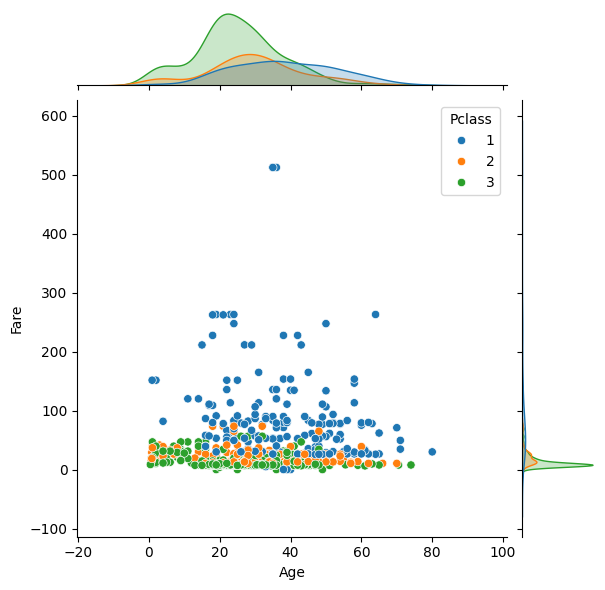

In [150]:
sns.jointplot(data=pax, x="Age", y="Fare", hue="Pclass")


Another way to plot two (continuous) variables is by creating joint histograms. In this case, bins are created for both variables and each cell's colour represent the count of each given pair. For example, looking at fare and age, with and without discrimating by sex: 

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 3)) # plotting multiple panels
sns.histplot(x='Age',y='Fare', data=pax, bins=30, ax=axs[0] )
sns.histplot(x='Age',y='Fare', data=pax, bins=30, hue='Pclass', ax=axs[1] )

We can also use the hue in histograms to discriminate between males/females or by classes.  

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 3)) # plotting multiple panels
sns.histplot( x='Age',hue='Sex',data=pax, ax=axs[0] )
sns.histplot( x='Age',hue='Pclass', data=pax, ax=axs[1] ) 

In this case, the visualisation is not very useful, as there are too many histograms on top of each other. Instead, you can use kdeplots:

In [ ]:
fig, axs = plt.subplots(1,2,figsize=(10, 3)) # plotting multiple panels
sns.kdeplot( x='Age',hue='Sex',data=pax, ax=axs[0] )
sns.kdeplot( x='Age',hue='Pclass', data=pax, ax=axs[1] ) 

Alternative ways to plot these include boxplots, violin plots and boxenplots:

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(12, 3)) # plotting multiple panels
sns.boxplot(data=pax, x="Age", y="Sex", ax=axs[0])
sns.violinplot(data=pax, x="Age", y="Sex", ax=axs[1])
sns.boxenplot(data=pax, x="Age", y="Sex", ax=axs[2])

In [ ]:
fig, axs = plt.subplots(1,3,figsize=(12, 3)) # plotting multiple panels
sns.boxplot(data=pax, x="Age", y="Pclass", ax=axs[0])
sns.violinplot(data=pax, x="Age", y="Pclass", ax=axs[1])
sns.boxenplot(data=pax, x="Age", y="Pclass", ax=axs[2])

And we can even add some more info, for example, we can distinguish between people embarked in the different ports.

In [ ]:
sns.boxenplot(data=pax, x="Age", y="Sex", hue='Embarked')

## Exploring the outcome and input variables
In this case, surviving would be the value that we would like to predict.  Let's start seeing whether the other variables show any pattern with predict. 

In [ ]:
pax.columns

In [ ]:
sns.countplot( x='Pclass',hue='Survived', data=pax)

In [ ]:
sns.countplot( x='Sex',hue='Survived', data=pax)

In [ ]:
sns.violinplot(x='Age',hue='Survived', data=pax) # or violinplot

In [ ]:
sns.countplot(x='SibSp',hue='Survived', data=pax)

In [ ]:
sns.countplot(x='Parch',hue='Survived', data=pax)

In [ ]:
sns.boxplot(x='Fare',hue='Survived', data=pax) 

In [ ]:

sns.countplot(x='Embarked',hue='Survived', data=pax)

Any other combination that is of use here?

## Exploring correlations between many variables

When you have many variables, it is worth checking other functions, such as heatmap or pairplots.  That is left for the interested reader (and/or the practical).